### 1) Classify the iris dataset using a decision tree classifier. Divide the dataset into training and  testing in the ratio 80:20. Use the functions from the sklearn package. Display the final Decision Tree.

Accuracy: 0.9333333333333333


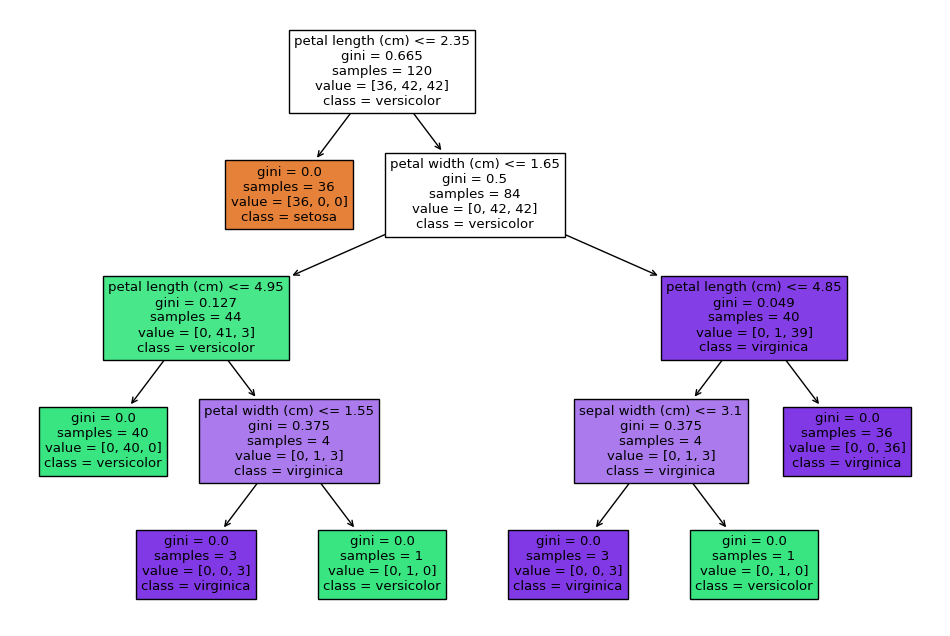

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

accuracy = classifier.score(x_test, y_test)
print("Accuracy:", accuracy)

plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=iris.feature_names,class_names=iris.target_names, filled=True)
plt.show()





### 2) Classify the iris dataset using a Bayes classifier.. Divide the dataset into training and testing in the ratio 80:20. Use the functions from the sklearn package. Assume the data follows a gaussian distribution. Display the training and testing accuracy, confusion matrix.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = GaussianNB()

model.fit(x_train, y_train)


y_pred = model.predict(x_test)

train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Training Accuracy: 0.95
Testing Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


 ### 3) Classify the iris dataset using the KNN classifier. Divide the dataset into training, validation, and testing in the ratio 70:15:15. Use the functions from the sklearn package.  Find the best value for k. Normalize the dataset before applying the model. Display the training, validation, and testing accuracy, confusion matrix.

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


best_k = None
best_accuracy = 0
for k in range(1, 21):  # trying k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_accuracy = knn.score(X_val, y_val)
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_k = k


knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


y_train_pred = knn.predict(X_train)
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)


conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Testing Set):")
print(conf_matrix)



Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 0.9565217391304348
Confusion Matrix (Testing Set):
[[6 0 0]
 [0 9 1]
 [0 0 7]]


### 4) Create a linear regression model using ordinary least squares estimation. Find the best fit line for the dataset ‘salary.csv’ using the above model. Display the training and testing dataset in the scatter plot and draw the best fit line in the same. Also find the MSE and R2 for the testing dataset.

Mean Squared Error (MSE): 55761791.306260146
R2 Score: 0.8914234140042779


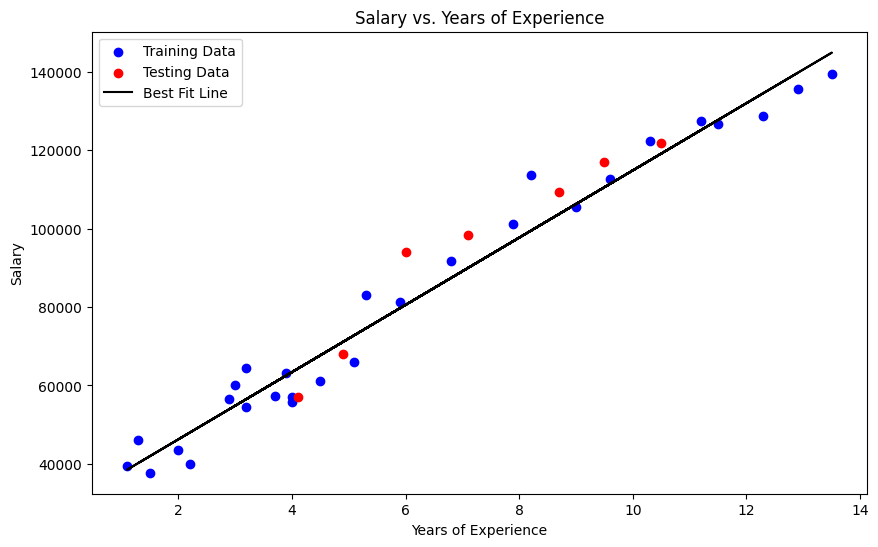

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('salary.csv')

X = data['YearsExperience'].values.reshape(-1, 1) 
y = data['Salary']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, y_train_pred, color='black', label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.legend()
plt.show()


### 5) Consider the dataset california_housing from sklearn . Find the correlation b/w the different attributes of this dataset. Using the least square estimation method from sklearn, find the best fit line. Also find the error

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


data = fetch_california_housing()


df = pd.DataFrame(data.data, columns=data.feature_names)


df['Target'] = data.target


correlation_matrix = df.corr()


print("Correlation Matrix:")
print(correlation_matrix)


X = df.drop(columns='Target')  #everything except target column
y = df['Target'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    Target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -

### 6)  Consider the dataset ‘Adveristing.csv’. Find the correlation coefficient between the input
 attributes TV, Radio, Newspaper and Output Attribute Sales. Use least square estimatio
 method to find the line of regression bw
 1. TV and Saes
 2. Radio and S les
3. Newspaper and ales
 For all of the above options, also draw a scatter plot and line of regression. Also find the eror in
 each of the above.

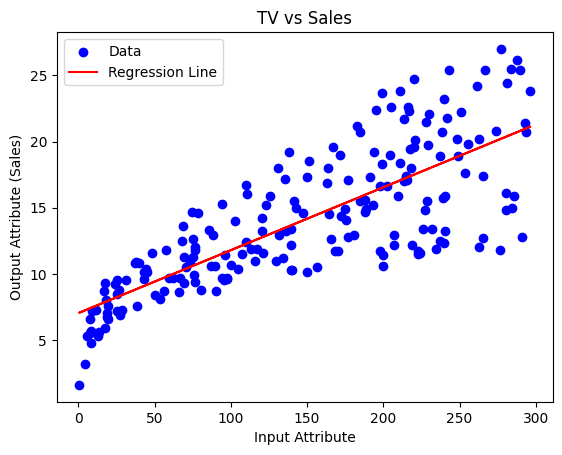

Correlation coefficient between TV and Sales: 0.7822244248616066
Regression line equation for TV and Sales: Sales = 7.032593549127698 + 0.04753664043301965 * TV
Root Mean Squared Error for TV and Sales: 3.2423221486546887


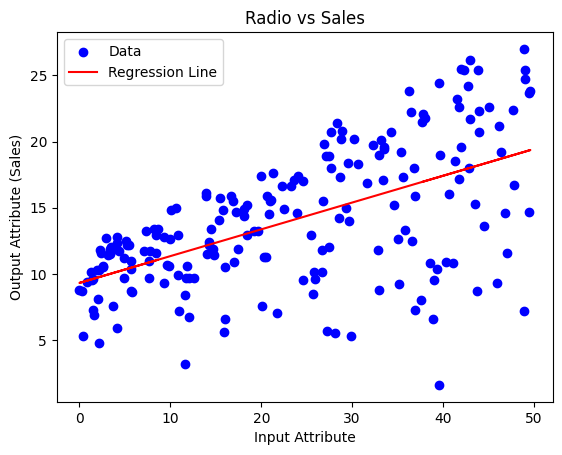


Correlation coefficient between Radio and Sales: 0.5762225745710553
Regression line equation for Radio and Sales: Sales = 9.311638095158273 + 0.2024957833924399 * Radio
Root Mean Squared Error for Radio and Sales: 4.2535159274564185


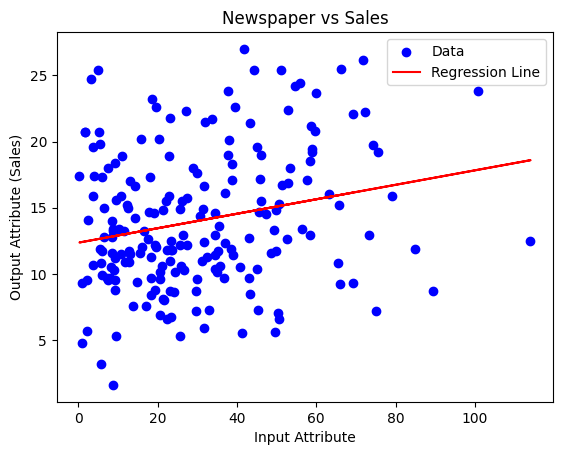


Correlation coefficient between Newspaper and Sales: 0.22829902637616534
Regression line equation for Newspaper and Sales: Sales = 12.351407069278164 + 0.0546930984722733 * Newspaper
Root Mean Squared Error for Newspaper and Sales: 5.066953988399708


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Advertising.csv')

# Calculate correlation coefficients
correlation_tv_sales = df['TV'].corr(df['Sales'])
correlation_radio_sales = df['Radio'].corr(df['Sales'])
correlation_newspaper_sales = df['Newspaper'].corr(df['Sales'])

# Least squares estimation function
def least_squares(x, y):
    X = np.column_stack((np.ones(len(x)), x))
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

# Linear regression function
def linear_regression(x, y):
    beta = least_squares(x, y)
    y_pred = beta[0] + beta[1] * x
    return beta, y_pred

# Plot scatter plot and line of regression
def plot_regression(x, y, y_pred, title):
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_pred, color='red', label='Regression Line')
    plt.title(title)
    plt.xlabel('Input Attribute')
    plt.ylabel('Output Attribute (Sales)')
    plt.legend()
    plt.show()

# Calculate errors
def calculate_error(y, y_pred):
    error = np.sqrt(np.mean((y - y_pred) ** 2))
    return error

# Linear regression for TV and Sales
beta_tv, y_pred_tv = linear_regression(df['TV'], df['Sales'])
plot_regression(df['TV'], df['Sales'], y_pred_tv, 'TV vs Sales')
error_tv = calculate_error(df['Sales'], y_pred_tv)
print("Correlation coefficient between TV and Sales:", correlation_tv_sales)
print("Regression line equation for TV and Sales: Sales =", beta_tv[0], "+", beta_tv[1], "* TV")
print("Root Mean Squared Error for TV and Sales:", error_tv)

# Linear regression for Radio and Sales
beta_radio, y_pred_radio = linear_regression(df['Radio'], df['Sales'])
plot_regression(df['Radio'], df['Sales'], y_pred_radio, 'Radio vs Sales')
error_radio = calculate_error(df['Sales'], y_pred_radio)
print("\nCorrelation coefficient between Radio and Sales:", correlation_radio_sales)
print("Regression line equation for Radio and Sales: Sales =", beta_radio[0], "+", beta_radio[1], "* Radio")
print("Root Mean Squared Error for Radio and Sales:", error_radio)

# Linear regression for Newspaper and Sales
beta_newspaper, y_pred_newspaper = linear_regression(df['Newspaper'], df['Sales'])
plot_regression(df['Newspaper'], df['Sales'], y_pred_newspaper, 'Newspaper vs Sales')
error_newspaper = calculate_error(df['Sales'], y_pred_newspaper)
print("\nCorrelation coefficient between Newspaper and Sales:", correlation_newspaper_sales)
print("Regression line equation for Newspaper and Sales: Sales =", beta_newspaper[0], "+", beta_newspaper[1], "* Newspaper")
print("Root Mean Squared Error for Newspaper and Sales:", error_newspaper)


### 7) Consider the dataset ‘Advertising.csv’. Find the best fit regression line between the input attributes TV, Radio, Newspaper and Output Attribute Sales using gradient descent method. Also find R2 .

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Advertising.csv')

X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

X = np.c_[np.ones(X.shape[0]), X]

def gradient_descent(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)  
    for _ in range(iterations):
      
        h = np.dot(X, theta)
        
        error = h - y
        
        gradient = np.dot(X.T, error) / m
        
        theta -= alpha * gradient
    return theta

theta = gradient_descent(X, y)

def r_squared(X, y, theta):
    y_pred = np.dot(X, theta)
    ssr = np.sum((y_pred - y.mean())**2)
    sst = np.sum((y - y.mean())**2)
    return 1 - (ssr / sst)

r2 = r_squared(X, y, theta)
print("R-squared value:", r2)

print("Optimal parameters (theta):", theta)


R-squared value: 0.10312714919778021
Optimal parameters (theta): [-2.85993451e-17  7.53030724e-01  5.36068676e-01 -3.90832320e-03]


 ### 8) Use logistic regression to build a model to classify the breast cancer dataset  Divide the dataset into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity. For each iteration of training, store the training and testing accuracy. Plot a graph showing training and testing accuracy Vs iteration no. Do not use sklearn logistic function

C:\Users\jenaa\AppData\Local\Temp\ipykernel_22608\2478765188.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Confusion Matrix:
[[131   1]
 [ 10  29]]
Sensitivity: 0.7435897435897436
Specificity: 0.9924242424242424


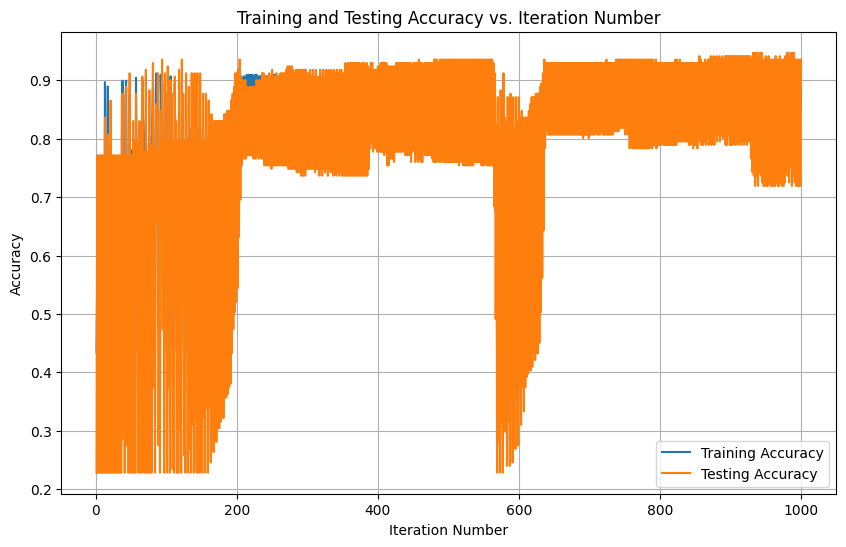

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def calculate_confusion_matrix(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))

    confusion_matrix = np.array([[true_negative, false_positive],
                                  [false_negative, true_positive]])

    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    return confusion_matrix, sensitivity, specificity

data = pd.read_csv('breast_cancer.csv')

data.drop('id', axis=1, inplace=True)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

X = np.c_[np.ones(X.shape[0]), X]

split = int(0.7 * X.shape[0])
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

np.random.seed(0)
theta = np.random.randn(X_train.shape[1])

alpha = 0.01
iterations = 1000

train_accuracy_list = []
test_accuracy_list = []

for i in range(iterations):
    z_train = np.dot(X_train, theta)
    h_train = sigmoid(z_train)

    z_test = np.dot(X_test, theta)
    h_test = sigmoid(z_test)

    gradient = np.dot(X_train.T, (h_train - y_train)) / y_train.size

    theta -= alpha * gradient

    y_train_pred = (h_train >= 0.5).astype(int)
    y_test_pred = (h_test >= 0.5).astype(int)

    train_accuracy = calculate_accuracy(y_train, y_train_pred)
    test_accuracy = calculate_accuracy(y_test, y_test_pred)

    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

conf_matrix, sensitivity, specificity = calculate_confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, iterations + 1), test_accuracy_list, label='Testing Accuracy')
plt.title('Training and Testing Accuracy vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### 9) Using logistic regression to build a model to classify the iris dataset. Divide the dataset into training and testing in the ratio 80:20 . Print the confusion matrix, sensitivity and specificity.

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Sensitivity: 1.0
Specificity: 1.0


 ### 10) Create a linear regression model using the gradient descent method. Create a class to represent the model with the following functions - init, fit and predict. Find the best fit line for the dataset Also find the MSE and R2 for the testing dataset

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]

        self.theta = np.zeros(X.shape[1])

        for _ in range(self.iterations):
            y_pred = np.dot(X, self.theta)

            gradient = np.dot(X.T, (y_pred - y)) / y.size

            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        y_pred = np.dot(X, self.theta)
        return y_pred


model = LinearRegressionGD()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Mean Squared Error (MSE): 0.04650825313638066
R2 Score: 0.933454009820759


 ### 11)Consider the dataset wine from sklearn. Using PCA reduce the dimensionality of the dataset to 5. Build a classification model using gaussian naive bayes classifier. Find the training accuracy and test accuracy.

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9366197183098591
Testing Accuracy: 1.0


### 12)  Consider the dataset iris. Apply the PCA method to select the best 2 features. Using these features plot the scatter graph. Apply k-means clustering algorithm to cluster the transformed dataset into 3 clusters

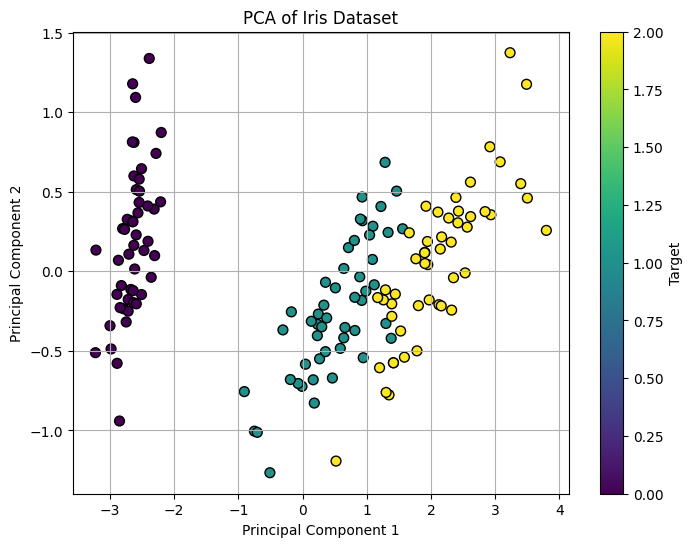

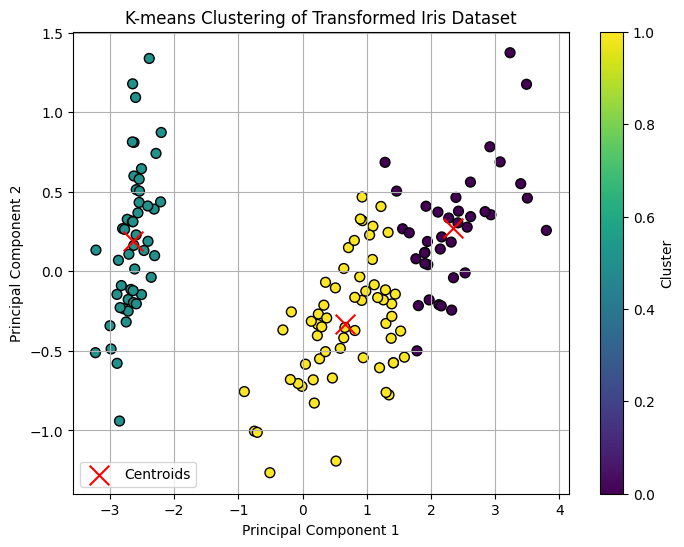

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Transformed Iris Dataset')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


### 13) Write a program to implement a single layer perceptron model. Train this for solving a AND problem with 3 variables.

In [13]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Train the perceptron
        for _ in range(self.max_iter):
            for i in range(n_samples):
                # Compute the predicted value (activation)
                predicted = np.dot(self.weights, X[i]) + self.bias
                # Apply step function to predict the class label
                predicted = 1 if predicted >= 0 else 0

                # Update weights and bias based on prediction error
                self.weights += self.learning_rate * (y[i] - predicted) * X[i]
                self.bias += self.learning_rate * (y[i] - predicted)

    def predict(self, X):
        # Compute predicted class labels
        predicted = np.dot(X, self.weights) + self.bias
        predicted = np.where(predicted >= 0, 1, 0)
        return predicted

# Define the training data (AND problem with 3 variables)
X_train = np.array([[0, 0, 0],
                     [0, 0, 1],
                     [0, 1, 0],
                     [0, 1, 1],
                     [1, 0, 0],
                     [1, 0, 1],
                     [1, 1, 0],
                     [1, 1, 1]])

# Define the target labels for the AND problem
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 1])

# Create a single-layer perceptron model
model = Perceptron()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Print the predictions
print("Predictions:", y_pred)


Predictions: [0 0 0 0 0 0 0 1]


### 14) Consider the dataset iris. Apply hierarchical clustering algorithm to cluster the dataset into 3 clusters.

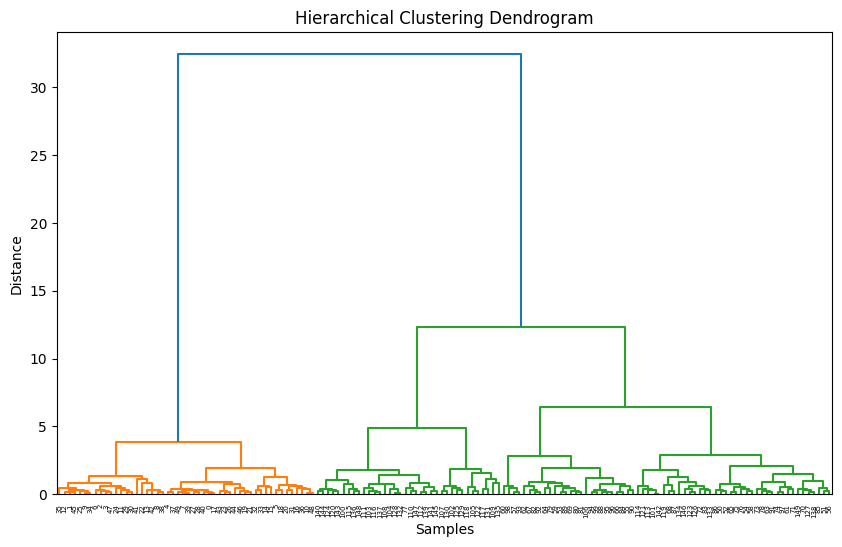

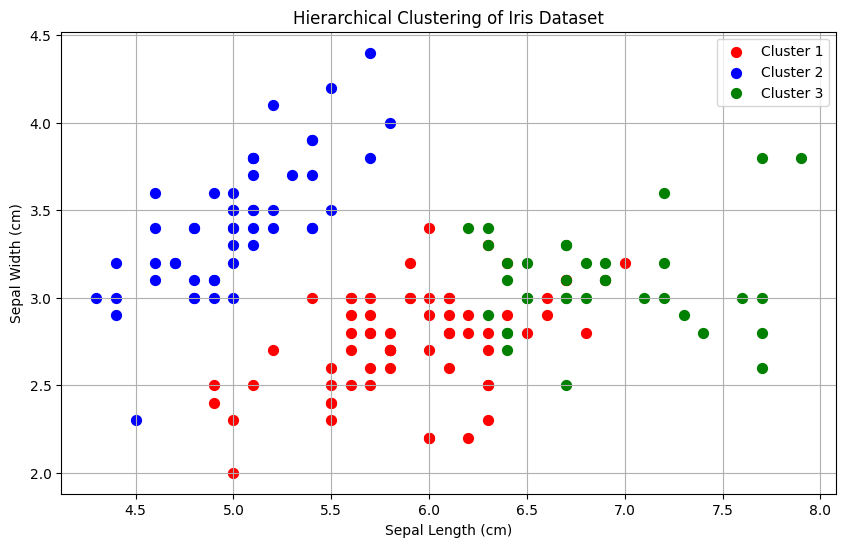

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply hierarchical clustering algorithm to cluster the dataset into 3 clusters
# Using Ward linkage and Euclidean distance
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot clustered data
plt.figure(figsize=(10, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


### 15) Write a program to implement 2-layered ANN for classifying digits datasets from sklearn. Use 70% data for training the model and check the accuracy of the model on remaining 30% data. Use softmax activation function in the last layer and relu function in the hidden layer

In [15]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

class TwoLayeredANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, max_iter=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def fit(self, X, y):
        for _ in range(self.max_iter):
            # Forward propagation
            z_hidden = np.dot(X, self.weights_hidden) + self.bias_hidden
            a_hidden = relu(z_hidden)
            z_output = np.dot(a_hidden, self.weights_output) + self.bias_output
            a_output = softmax(z_output)

            # Backpropagation
            d_output = a_output - y
            d_hidden = np.dot(d_output, self.weights_output.T) * (z_hidden > 0)

            # Update weights and biases
            self.weights_output -= self.learning_rate * np.dot(a_hidden.T, d_output)
            self.bias_output -= self.learning_rate * np.sum(d_output, axis=0, keepdims=True)
            self.weights_hidden -= self.learning_rate * np.dot(X.T, d_hidden)
            self.bias_hidden -= self.learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    def predict(self, X):
        z_hidden = np.dot(X, self.weights_hidden) + self.bias_hidden
        a_hidden = relu(z_hidden)
        z_output = np.dot(a_hidden, self.weights_output) + self.bias_output
        a_output = softmax(z_output)
        return np.argmax(a_output, axis=1)

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# One-hot encode the target labels
encoder = OneHotEncoder(categories='auto')
y_onehot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

# Create a two-layered ANN model
model = TwoLayeredANN(input_size=X.shape[1], hidden_size=128, output_size=y_onehot.shape[1])

# Train the model
model.fit(X_train, y_train)

# Make predictions on testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.09074074074074075
